<h4>Predicting GDP Per Capita Using 2020 HCI Data And Visualizations</h4>

<h5>Group 7 - Matthew Heeter, John Le, and Andrew Nguyen</h5>

<h2>Question and Background Information</h2>

 The World Bank's Human Capital Project is an initiative that aims to increase the productive capacity of people in developing countries through investments in health, education, and training. The project aims to improve human capital outcomes, such as health outcomes, educational achievements, and labor market outcomes, in order to accelerate economic growth and reduce poverty. It also aims to promote gender equality and inclusivity. 
 
 The project uses data and evidence to inform policy decisions and interventions at the national and subnational levels, and works with governments, civil society organizations, and other stakeholders to design and implement effective policies and programs. The project also focuses on the measurement of human capital, including the development of the Human Capital Index (HCI), which ranks countries (from a scale of 0 to 1, with 1 being the highest rank) based on their investments in health, education, and training. 
 
 The HCI is used to inform policy decisions and track progress over time. Overall, the goal of the Human Capital Project is to help countries achieve their development goals and create a more prosperous future for all their citizens.

<h2>Research Goals</h2>

1) Predicting health outcomes based on investments in health, education, and training: This project could involve using machine learning algorithms to predict health outcomes (such as infant mortality rates or life expectancy) based on data on investments in health, education, and training. The goal of this project would be to identify the most effective interventions for improving health outcomes in developing countries.

2) Predicting educational achievements based on investments in education and training: This project could involve using machine learning algorithms to predict educational achievements (such as literacy rates or enrollment rates) based on data on investments in education and training. The goal of this project would be to identify the most effective interventions for improving educational outcomes in developing countries.

3) Predicting labor market outcomes based on investments in education and training: This project could involve using machine learning algorithms to predict labor market outcomes (such as employment rates or wage levels) based on data on investments in education and training. The goal of this project would be to identify the most effective interventions for improving labor market outcomes in developing countries.

Related Research - HCI vs. GDP per capita seem to have a strong, positive, and linear relationship as seen in the 2016 Our World in Data website. 
Source: https://ourworldindata.org/grapher/human-capital-index-vs-gdp

<h2>Questions</h2>

 1) What's the most optimal machine learning model for accurately predicting a country’s GDP per capita using HCI (Human Capital Index) socio-economic and demographic data?   
 2) How do we effectively portray the relationships between HCI and GDP per capita? 



<h2>Exploratory Data Analysis</h2>

<h4>Dataset: World Bank Human Capital Index Dataset (2020)</h4>
<h4>Data Cleaning</h4>

In [43]:
import pandas as pd

# Read the Excel file into a DataFrame
hci = pd.read_excel('/Users/mattheeter/DS4002/hci_data_september_2020.xlsx', sheet_name='HCI 2020 - MaleFemale')
hci=hci[hci.columns[0:13]]
# Apply the 'default' style to the DataFrame
hci.style.set_caption('Human Capital Index (HCI) - Male and Female')
# Drop WB Code
hci = hci.drop('WB Code', axis = 1)
# Drop upper and lower bounds
hci = hci.drop('HUMAN CAPITAL INDEX 2020 (LOWER BOUND)', axis = 1)
hci = hci.drop('HUMAN CAPITAL INDEX 2020 (UPPER BOUND)', axis = 1)
hci = hci.drop('Fraction of Children Under 5 Not Stunted', axis = 1)
# hci = hci.dropna()
# hci = hci[hci['Fraction of Children Under 5 Not Stunted'] != '-']
# Print the DataFrame
hci.head()

,Country Name,Region,Income Group,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020
0,Afghanistan,South Asia,Low income,0.937724,8.901891,354.758789,5.052838,0.787741,0.400284
1,Albania,Europe & Central Asia,Upper middle income,0.991177,12.889381,434.127594,8.953018,0.929366,0.634251
2,Algeria,Middle East & North Africa,Lower middle income,0.976518,11.848035,374.089081,7.091553,0.909282,0.534556
3,Angola,Sub-Saharan Africa,Lower middle income,0.922835,8.120066,325.965485,4.234978,0.729359,0.362405
4,Antigua and Barbuda,Latin America & Caribbean,High income,0.993559,12.967560,406.997437,8.444422,0.897208,0.595704


- Main dataset: 2020 Human Capital Index
- Derived from the World Bank database
- Data from September 2020 for 174 countries with each row representing a specific country
- Includes columns on WB code, region, and income group for each country
- Also contains columns on specific Human Capital Index (HCI) information, such as Probability of Survival to Age 5, Expected Years of School, Harmonized Test Scores, Learning- Adjusted Years of School, Fraction of Children Under 5 Not Stunted, Adult Survival Rate, calculated HCI score with its lower bound and upper bound for each country
- Removed lower bound and upper bound of HCI 2020, Fraction of Children Under 5 Not Stunted column (because there were too many missing/null values), and WB code (unnecessary categorical variable)

<h4>Dataset: World Bank GDP Per Capita ($) Dataset (1965-2021)</h4>

In [44]:
import pandas as pd
# Read the Excel file into a DataFrame
gdp = pd.read_csv('/Users/mattheeter/DS4002/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv')
gdp2020 = gdp[['Country Name','2020']]

# Apply the 'default' style to the DataFrame
gdp.style.set_caption('Data')

# Print the DataFrame
gdp2020.head()

,Country Name,2020
0,Aruba,24487.863560
1,Africa Eastern and Southern,1353.769160
2,Afghanistan,516.866552
3,Africa Western and Central,1683.436391
4,Angola,1603.993477


- Also derived from the World Bank database
- Data from 1965 - 2021 on countries’ GDP per capita
- Each row represents a country and the columns are the year
- Data from 266 markets - including counties, regions and territories


<h4>Merge two datasets</h4>

In [45]:
# Merge the two datasets on the 'Country' column
df = pd.merge(hci, gdp2020, on='Country Name')

# Drop rows with any null values
df = df.dropna()
# Drop the country name 
df_train = df.drop('Country Name', axis = 1)
# Print the merged DataFrame
df.head()



,Country Name,Region,Income Group,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020,2020
0,Afghanistan,South Asia,Low income,0.937724,8.901891,354.758789,5.052838,0.787741,0.400284,516.866552
1,Albania,Europe & Central Asia,Upper middle income,0.991177,12.889381,434.127594,8.953018,0.929366,0.634251,5332.160475
2,Algeria,Middle East & North Africa,Lower middle income,0.976518,11.848035,374.089081,7.091553,0.909282,0.534556,3337.252512
3,Angola,Sub-Saharan Africa,Lower middle income,0.922835,8.120066,325.965485,4.234978,0.729359,0.362405,1603.993477
4,Antigua and Barbuda,Latin America & Caribbean,High income,0.993559,12.967560,406.997437,8.444422,0.897208,0.595704,14787.635780


<h4>Summary Stats</h4>

In [46]:
# Get summary statistics of the DataFrame
df_stats = df.describe()

# Apply formatting to the table
df_stats.style.set_caption('Summary Statistics')
df_stats.style.set_precision(2)
df_stats.style.format({'mean': '${:,.2f}', 'min': '${:,.2f}', 'max': '${:,.2f}'})

# Display the table
df_stats

/var/folders/nj/705wgkn91bx4dynjyw516f840000gn/T/ipykernel_66173/750947143.py:6: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020,2020
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.973054,11.379255,423.947414,7.869514,0.850771,0.564158,14157.843802
std,0.027431,2.276297,62.781017,2.429186,0.083304,0.137317,19679.216603
min,0.880086,4.156989,304.922241,2.206502,0.522544,0.291632,216.826741
25%,0.960007,10.144179,379.442459,6.085780,0.802397,0.453250,1899.932748
50%,0.984219,12.201100,414.321365,7.941399,0.861430,0.566201,5342.754270
75%,0.992954,13.121243,473.094193,9.763350,0.916337,0.666993,16945.454083
max,0.998305,13.936425,575.272156,12.813290,0.961434,0.879126,117370.496900


<h4>Boxplots</h4>

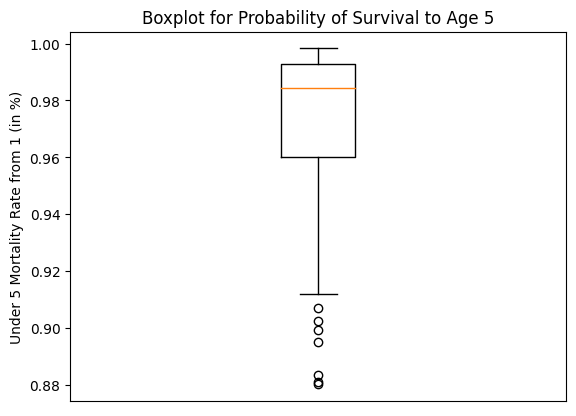

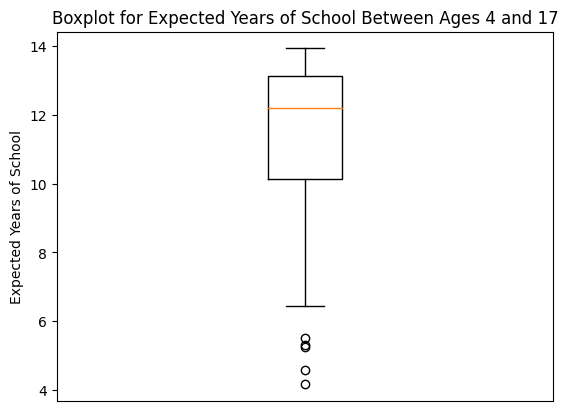

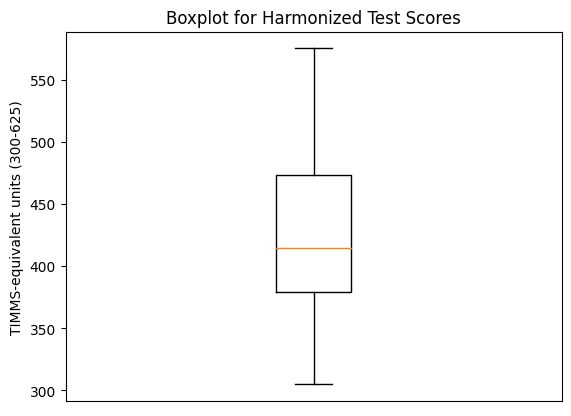

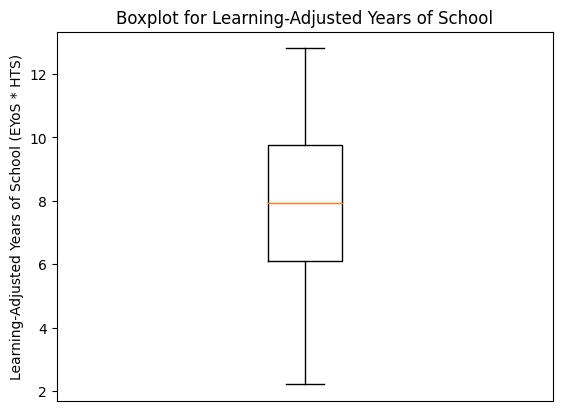

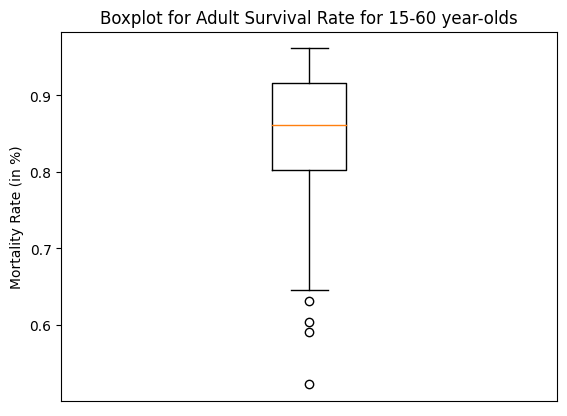

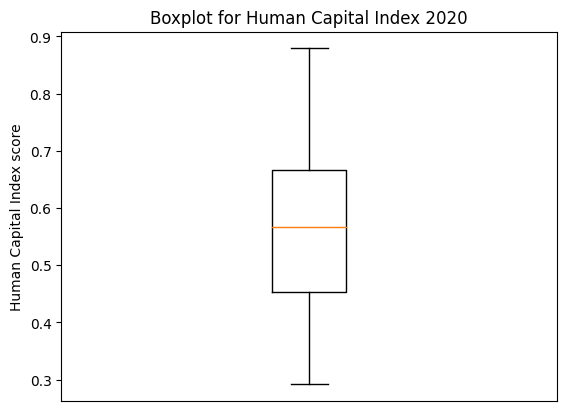

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with Probability of Survival to Age 5
df_ps5 = df["Probability of Survival to Age 5"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_ps5)

# Add a title
plt.title("Boxplot for Probability of Survival to Age 5")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("Under 5 Mortality Rate from 1 (in %)")

# Display the plot
plt.show()

# Create a dataframe with Expected Years of School
df_eys = df["Expected Years of School"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_eys)

# Add a title
plt.title("Boxplot for Expected Years of School Between Ages 4 and 17")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("Expected Years of School")

# Display the plot
plt.show()

# Create a dataframe with Harmonized Test Scores
df_hts = df["Harmonized Test Scores"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_hts)

# Add a title
plt.title("Boxplot for Harmonized Test Scores")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("TIMMS-equivalent units (300-625)")

# Display the plot
plt.show()

# Create a dataframe with Learning-Adjusted Years of School
df_lys = df["Learning-Adjusted Years of School"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_lys)

# Add a title
plt.title("Boxplot for Learning-Adjusted Years of School")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("Learning-Adjusted Years of School (EYoS * HTS)")

# Display the plot
plt.show()

# Create a dataframe with Adult Survival Rate
df_adr = df["Adult Survival Rate"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_adr)

# Add a title
plt.title("Boxplot for Adult Survival Rate for 15-60 year-olds")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("Mortality Rate (in %)")

# Display the plot
plt.show()

# Create a dataframe with Human Capital Index 2020
df_hci = df["HUMAN CAPITAL INDEX 2020"]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the boxplot with the new dataframe
bp = ax.boxplot(df_hci)

# Add a title
plt.title("Boxplot for Human Capital Index 2020")

# Remove x-axis 
ax.xaxis.set_visible(False)

# Add y-axis
plt.ylabel("Human Capital Index score")

# Display the plot
plt.show()


<h4>Data Processing</h4>

In [48]:
#Data Processing for Categorical Variables 
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['Region', 'Income Group']

# Create a label encoder for each column
le_dict = {}
for col in cat_cols:
    le_dict[col] = LabelEncoder()
    le_dict[col].fit(df[col])

# Use the label encoders to transform the categorical variables and store the encoded values in new columns
for col in cat_cols:
    df_train[col + '_encoded'] = le_dict[col].transform(df_train[col])
    
df_train.head()


,Region,Income Group,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020,2020,Region_encoded,Income Group_encoded
0,South Asia,Low income,0.937724,8.901891,354.758789,5.052838,0.787741,0.400284,516.866552,5,1
1,Europe & Central Asia,Upper middle income,0.991177,12.889381,434.127594,8.953018,0.929366,0.634251,5332.160475,1,3
2,Middle East & North Africa,Lower middle income,0.976518,11.848035,374.089081,7.091553,0.909282,0.534556,3337.252512,3,2
3,Sub-Saharan Africa,Lower middle income,0.922835,8.120066,325.965485,4.234978,0.729359,0.362405,1603.993477,6,2
4,Latin America & Caribbean,High income,0.993559,12.967560,406.997437,8.444422,0.897208,0.595704,14787.635780,2,0


<h4>One Hot Encoding</h4>

In [49]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode
cat_cols = ['Region', 'Income Group']

# Create an OneHotEncoder object
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the categorical columns
ohe.fit(df_train[cat_cols])

# Use the OneHotEncoder to transform the categorical columns and concatenate the encoded columns to the original DataFrame
encoded_df = pd.concat([df_train, pd.DataFrame(ohe.transform(df_train[cat_cols]).toarray(), columns=ohe.get_feature_names_out(cat_cols))], axis=1)

# Drop the original categorical columns
encoded_df = encoded_df.drop(cat_cols, axis=1)

#Cleaning 
encoded_df = encoded_df.dropna()
# Saves csv onto computer 
# encoded_df.to_csv('data5.csv', index=False)



In [50]:
# Merge encoded_df (clean data) and df (country name)

# index country name from original dataframe
df_country = df["Country Name"]
df_country= df_country.to_frame()

# set the row number as the index
df_country.index.name = "index"
encoded_df.index.name = "index"

# # join the DataFrames on the index column
final_df_country = df_country.merge(encoded_df, left_index=True, right_index=True)

# # print the result
final_df_country.head()
# final_df_country.to_csv('final_df_country.csv', index=False)


,Country Name,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020,2020,Region_encoded,Income Group_encoded,...,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Income Group_High income,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
index,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,0.937724,8.901891,354.758789,5.052838,0.787741,0.400284,516.866552,5.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Albania,0.991177,12.889381,434.127594,8.953018,0.929366,0.634251,5332.160475,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Algeria,0.976518,11.848035,374.089081,7.091553,0.909282,0.534556,3337.252512,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Angola,0.922835,8.120066,325.965485,4.234978,0.729359,0.362405,1603.993477,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Antigua and Barbuda,0.993559,12.967560,406.997437,8.444422,0.897208,0.595704,14787.635780,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<h2>Methods</h2>


<h4>Removing Outliers Using Z-Scores</h4>

In [51]:
import numpy as np
from scipy import stats

# calculate z-scores for each data point in the column
z_scores = stats.zscore(encoded_df["2020"])

# remove the rows with outliers in the "2020" column
encoded_df = encoded_df[np.abs(z_scores) < 3]

encoded_df.head()

,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Adult Survival Rate,HUMAN CAPITAL INDEX 2020,2020,Region_encoded,Income Group_encoded,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Income Group_High income,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
index,,,,,,,,,,,,,,,,,,,,
0,0.937724,8.901891,354.758789,5.052838,0.787741,0.400284,516.866552,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.991177,12.889381,434.127594,8.953018,0.929366,0.634251,5332.160475,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.976518,11.848035,374.089081,7.091553,0.909282,0.534556,3337.252512,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.922835,8.120066,325.965485,4.234978,0.729359,0.362405,1603.993477,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.993559,12.967560,406.997437,8.444422,0.897208,0.595704,14787.635780,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<h4>Modeling</h4>

- After removing the outliers, we wanted to split the data into a training and testing data set with a 80/20 split, respectively because we felt an 80/20 split was appropriate since we did not have that much data, so we wanted to make sure our model was well-trained (hence the high 80% on training set).

- We wanted to run three models: Linear Regression (base model), Support Vector Machines (SVM), and K-nearest neighbors (KNN).

- Linear Regression is a base model. We started with the assumption that there is a linear relationship between HCI and GDP. 

- Support Vector Reggression was used to try to find a more accurate model. We chose SVR because the relationship between HCI and GDP may be non-linear and SVR will account for that, unlike linear regression. 

- KNN model was chosen because how it can effectively handle a small number of features and be less sensitive to hyperparameters. 



In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and labels
X = encoded_df.drop('2020', axis=1)
y = encoded_df['2020']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit an SVM model
svm = SVR()
svm.fit(X, y)

SVR()

In [53]:
from sklearn.neighbors import KNeighborsRegressor


#create the KNN model
knn = KNeighborsRegressor(n_neighbors=8)

# fit the model to the scaled training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

<h4>R-Squared Comparisons</h4>

We wanted to use R-squared, which is the proportion of variation in dependent variable explained and predicted by the independent variable, as the primary performance metric to see which models were most effective in predicting GDP per capita using HCI data. We found Linear Regression to have the highest R-Squared out of the three models of 0.8406, so we used the Linear Regression model to represent our predicted GDP per capita score through an interactive map visualization. The KNN models R-Squared score was 0.4937 and the SVR R-Squared score was -0.1696. It is important that the SVR R-Square score was negative here, indicating that this model was not a good fit for our dataset. 

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the linear regression model to make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Use the SVR model to make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the linear regression model using the test set
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate the SVR model using the test set
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Linear Regression MSE: {:.4f} R2: {:.4f}".format(mse_lr, r2_lr))
print("SVR MSE: {:.4f} R2: {:.4f}".format(mse_svm, r2_svm))


# Use the knn model to make predictions on the test set
y_pred_knn = knn.predict(X_test)


# Evaluate the knn model using the test set
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN MSE: {:.4f} R2: {:.4f}".format(mse_knn, r2_knn))

Linear Regression MSE: 34615379.5099 R2: 0.8406
SVR MSE: 254030694.3569 R2: -0.1696
KNN MSE: 109963918.1055 R2: 0.4937


<h4>Linear Regression Predictions</h4>

Here, we are using our best model, Linear Regression, find the R-Squared score and the predicted GDP per capita for the whole dataset. Before, we only found the values for the 20% test dataset.

In [55]:
y_pred_lr_all = lr.predict(X)
r2_pred_lr_all = r2_score(y, y_pred_lr_all)
print(r2_pred_lr_all)
#print(y_pred_lr_all)



0.7802252904685397


In [56]:
predicted_df = pd.DataFrame(y_pred_lr_all, columns=["Predicted"])

# reset the index of the test set

# concatenate the test set with the predicted values
result_df = pd.concat([y, predicted_df], axis=1)

result_df.head()

# result_df.to_csv('actual_predicted_values.csv', index = False)

,2020,Predicted
0,516.866552,1048.507017
1,5332.160475,12036.039461
2,3337.252512,7421.897684
3,1603.993477,-1732.400091
4,14787.635780,19192.659353


<h2>Evaluation of the model</h2>

<h4>Linear Regression Scatterplot</h4>
We wanted to efffectively represent the relationship between HCI and GDP per capita, so we decided to use a scatterplot because scatterplots are known to show whether or not a relationship exists between a multitude of data points. 

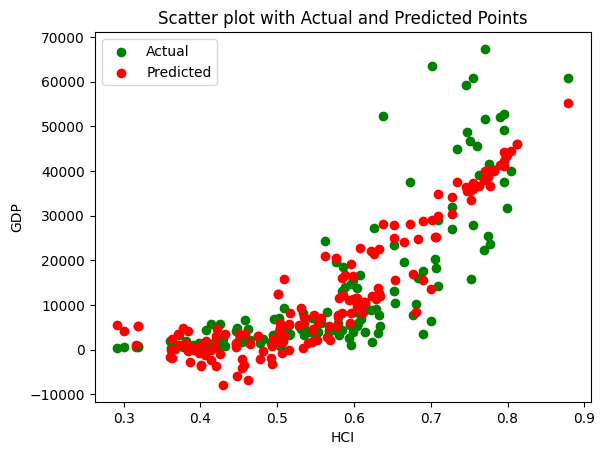

In [57]:
import matplotlib.pyplot as plt

x_plot = encoded_df["HUMAN CAPITAL INDEX 2020"]
y_plot = encoded_df["2020"]
#print(x_plot)
# print(y_plot)



actual_plot = plt.scatter(x_plot, y_plot, color = 'green')
predicted_plot = plt.scatter(x_plot, y_pred_lr_all, color='red')

#obtain m (slope) and b(intercept) of linear regression line

#use red as color for regression line

plt.legend((actual_plot, predicted_plot), ("Actual", "Predicted"))
plt.xlabel('HCI')
plt.ylabel('GDP')
plt.title('Scatter plot with Actual and Predicted Points')
plt.show()


This is a scatterplot of the HCI and GDP per capita actual and predicted values, where the predicted values are calculated from our Linear Regression model. There seems to be a strong, positive, and linear relationship between HCI and GDP per capita. Each data point represents a specific country in our dataset. As you can see, our predicted values from our Linear Regression model was not that far off from the actual values. 

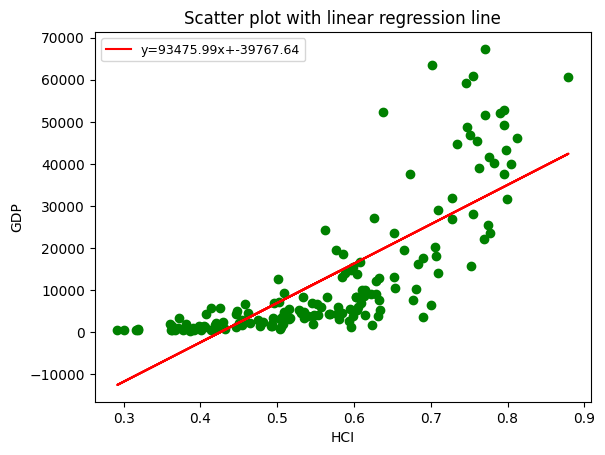

In [58]:
import matplotlib.pyplot as plt

x_plot = encoded_df["HUMAN CAPITAL INDEX 2020"]
y_plot = encoded_df["2020"]
# print(x_plot)
# print(y_plot)


plt.scatter(x_plot, y_plot, color = 'green')
#plt.plot(x_plot, y_pred_lr_all, color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x_plot, y_plot, 1)

#use red as color for regression line
plt.plot(x_plot, m*x_plot+b, color='red')


line = m*x_plot + b
plt.plot(x_plot, line, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
plt.legend(fontsize=9)



plt.xlabel('HCI')
plt.ylabel('GDP')
plt.title('Scatter plot with linear regression line')
plt.show()


This is a scatterplot of the actual HCI and GDP per capita values from our dataset that shows a strong, positive, and linear relationship between HCI and GDP per capita with a calculated regression like of 82449.56x + -34590.55. 

<h4>World Map Visualizations</h4>

In [59]:
import plotly.graph_objects as go
import pandas as pd

# Human Capital Index Interactive Choropleth Map
df_hci = pd.read_csv('/Users/mattheeter/DS4002/hci_code.csv')

fig_hci = go.Figure(data=go.Choropleth(
    locations = df_hci['CODE'],
    z = df_hci['HUMAN CAPITAL INDEX 2020'],
    text = df_hci['COUNTRY'],
    colorscale = 'agsunset',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'HCI Score (0-1)',
))

fig_hci.update_layout(
    title_text='Human Capital Index (HCI) 2020 Across the World', 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig_hci.show()

This interactive world map shows the HCI score (from 0 to 1) across all the countries in our dataset.

In [60]:
import plotly.graph_objects as go
import pandas as pd

df_gdp = pd.read_csv('/Users/mattheeter/DS4002/gdp_code.csv')

fig_gdp = go.Figure(data=go.Choropleth(
    locations = df_gdp['CODE'],
    z = df_gdp['GDP PER CAPITA 2020'],
    text = df_gdp['COUNTRY'],
    colorscale = 'electric',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP Per Capita',
))

fig_gdp.update_layout(
    title_text='Gross Domestic Product (GDP) Per Capita 2020 Across the World', 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig_gdp.show()

This interactive world map shows the GDP per Capita (in US $) across all the countries in our dataset.

In [61]:
import plotly.express as px
from ipywidgets import interact
import pandas as pd

df_gdp = pd.read_csv('/Users/mattheeter/DS4002/gdp_code.csv')

# Define the function to filter the data
def filter_data(min_gdp):
    mask = (df_gdp['GDP PER CAPITA 2020'] > min_gdp)
    df_filtered = df_gdp[mask]
    return df_filtered

df_filtered = filter_data(0)

fig = px.choropleth(data_frame=df_filtered,
                    locations='CODE', 
                    locationmode='ISO-3',
                    color='GDP PER CAPITA 2020',
                    hover_name='COUNTRY',
                    color_continuous_scale='Electric',
                    title='Gross Domestic Product (GDP) Per Capita 2020 Across the World', 
                    labels={'GDP PER CAPITA 2020':'GDP per capita'},
                    height=600
                    )
fig.show()

interact(filter_data, min_gdp=(0, df_gdp['GDP PER CAPITA 2020'].max()))


interactive(children=(FloatSlider(value=58685.24845, description='min_gdp', max=117370.4969), Output()), _dom_…

<function __main__.filter_data(min_gdp)>

In [62]:
import plotly.graph_objects as go
import pandas as pd

# GDP Predicted Interactive Choropleth Map
df_gdp_predicted = pd.read_csv('/Users/mattheeter/DS4002/gdp_predicted.csv')

fig_gdp_predicted = go.Figure(data=go.Choropleth(
    locations = df_gdp_predicted['CODE'],
    z = df_gdp_predicted['PERCENTAGE ERROR'],
    text = df_gdp_predicted['COUNTRY'],
    colorscale = [[0, 'green'], [0.1, 'yellow'], [1, 'red']],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'GDP Per Capita Percentage Error',
    zmin = 0,
    zmax = 10
))
fig_gdp_predicted.update_layout(
    title_text='Predicted GDP Per Capita 2020 Percentage Error Across the World', 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig_gdp_predicted.show()

This interactive world map shows the percentage error between our predicted GDP per capita values (using our Linear Regression model) and the actual GDP per capital values across all the countries in our dataset.

<h2>Conclusions</h2>

- In answering our first question of whether or not we could create a good machine learning model to predict GDP per capita using HCI information, we were able to create a decent machine learning model, using Linear Regression. We tested three different models: Linear Regression, SVM, and KNN, and their R-squared values were 0.8406, -0.1696, and 0.4937, respectively. Therefore, the Linear Regression model had the highest R-squared value out of the three models, so we decided to use that model to visually represent the predicted GDP per capita values. 
- In answering our second question of whether or not we could effectively portray the relationship between HCI and GDP per capita, we were able to come up with a variety of visualizations, including scatterplots, interactive world maps, and boxplots. We noted that countries with a higher HCI score tended to also have a higher GDP per capita, hence the linear relationship between those two variables. 
- We also learned how to develop the Flask application in Python, which allows us to upload our visualizations on an external web framework. 
- Limitations: One limitation of our project was definitely our dataset. We only had 162 countries (or datapoints) in our dataset after removing the missing and null values, which was not a good sample size for this project. With a sample size of 162 countries, we had limited predictive power. Unfortunately, we were only able to find 2020 HCI values online because we are assuming that it takes many years to gather HCI information. Also, HCI is a fairly new concept, given that it came out in 2018, so that's another reason why there is not a lot of data out there. However, we were really interested in this topic because we believe there were a lot of real-world applications, such as predicting health outcomes, educational achievements, and labor market outcomes. In our case, we focused on the labor market outcomes, and we noticed that countries with a higher GDP per capita have a higher HCI score, so countries should strive to increase their GDP per capita to ultimately increase their country's overall productivity in the next generation of workers. Countries can increase their GDP per capita by focusing on four key areas: personal consumption expenditures, business investment, government spending, and net exports of goods and services. 

<h2>Future Work</h2>

- Conduct the same project in the future when more HCI data becomes available 
- Use more performance metrics (besides R-squared)
- Test more stacked classifiers and deep learning models
- Find a different feature than HCI to predict GDP per capita 
- Create more filters within the interactive world map visualizations


<h2>Sources</h2>
https://www.worldbank.org/en/publication/human-capital
https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#
https://quarto.org/docs/computations/python.html#vs-code
https://ourworldindata.org/grapher/human-capital-index-vs-gdp
https://plotly.com/python/choropleth-maps/
https://towardsdatascience.com/k-nearest-neighbors-94395f445221
https://www.thebalancemoney.com/components-of-gdp-explanation-formula-and-chart-3306015
https://ipywidgets.readthedocs.io/
https://getbootstrap.com/docs/4.0/components/navbar/
https://docs.tibco.com/pub/spotfire/6.5.1/doc/html/3d_scat/3d_scat_what_is_a_3d_scatter_plot.htm#:~:text=3D%20scatter%20plots%20are%20used,%2C%20Y%2C%20and%20Z%20axes.
https://quarto.org/docs/output-formats/html-code.html#:~:text=%23%23%20Hiding%20Code%20For%20many,the%20document%20%60execute%60%20options.














<h2>Thank you for listening! Any questions?</h2>